# Implementacja optymalizacji gradientowej

In [55]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

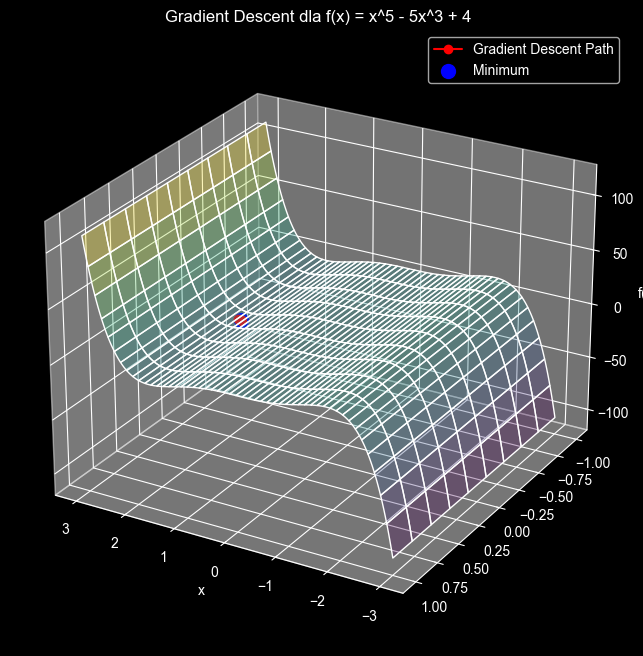

In [36]:
# Gradient descent function
def gradient_descent(f, grad_f, theta_init, learning_rate, iterations):
    theta = theta_init
    trajectory = [theta]  # Store theta values for visualization
    for i in range(iterations):
        theta -= learning_rate * grad_f(theta)
        trajectory.append(theta)
    return theta, trajectory

# Quadratic function and its gradient
f = lambda x: x**5 - 5*x**3 + 4
grad_f = lambda x: 5*x**4 - 15*x**2

# Parameters for gradient descent
theta_init = 1.8
learning_rate = 0.01
iterations = 30


# Perform gradient descent
optimal_theta, trajectory = gradient_descent(f, grad_f, theta_init, learning_rate, iterations)

# Create a grid for visualization
x = np.linspace(-3, 3, 400)
y = f(x)

# Prepare 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, np.linspace(-1, 1, 10))
Z = X**5 - 5*X**3 + 4

ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')

# Plot trajectory
trajectory_x = np.array(trajectory)
trajectory_y = np.zeros_like(trajectory_x)
trajectory_z = f(trajectory_x)

ax.plot(trajectory_x, trajectory_y, trajectory_z, color='red', marker='o', label='Gradient Descent Path')
ax.scatter(optimal_theta, 0, f(optimal_theta), color='blue', s=100, label='Minimum')

# Labeling the plot
ax.set_xlabel("x")
# ax.set_ylabel("Y-axis (fixed at 0)")
ax.set_zlabel("f(x)")
ax.set_title("Gradient Descent dla f(x) = x^5 - 5x^3 + 4")
ax.legend()
ax.view_init(elev=25, azim=120)
plt.show()


In [37]:
# Create 3D interactive plot
fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.7, name="Quadratic Surface"))

# Add gradient descent trajectory
fig.add_trace(go.Scatter3d(
    x=trajectory_x, 
    y=trajectory_y, 
    z=trajectory_z, 
    mode='markers+lines', 
    marker=dict(size=5, color='red'),
    line=dict(color='red', width=2),
    name="Gradient Descent Path"
))

# Add optimal point
fig.add_trace(go.Scatter3d(
    x=[optimal_theta], 
    y=[0], 
    z=[f(optimal_theta)], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name="Optimal Point"
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title="Theta",
        yaxis_title="Y-axis (fixed at 0)",
        zaxis_title="f(Theta)",
    ),
    title="Interactive Gradient Descent Visualization on Quadratic Function",
    width=800,  # Szerokość w pikselach
    height=600,  # Wysokość w pikselach
)

# Show the interactive plot
fig.show()

# Projektowanie i trenowanie prostych sieci w PyTorch

In [43]:
# Przygotowanie danych
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_test = torch.tensor(scaler.transform(X_test), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

Epoka 10/50, Błąd (CrossEntropy): 0.0012
Epoka 20/50, Błąd (CrossEntropy): 0.0004
Epoka 30/50, Błąd (CrossEntropy): 0.0002
Epoka 40/50, Błąd (CrossEntropy): 0.0001
Epoka 50/50, Błąd (CrossEntropy): 0.0001


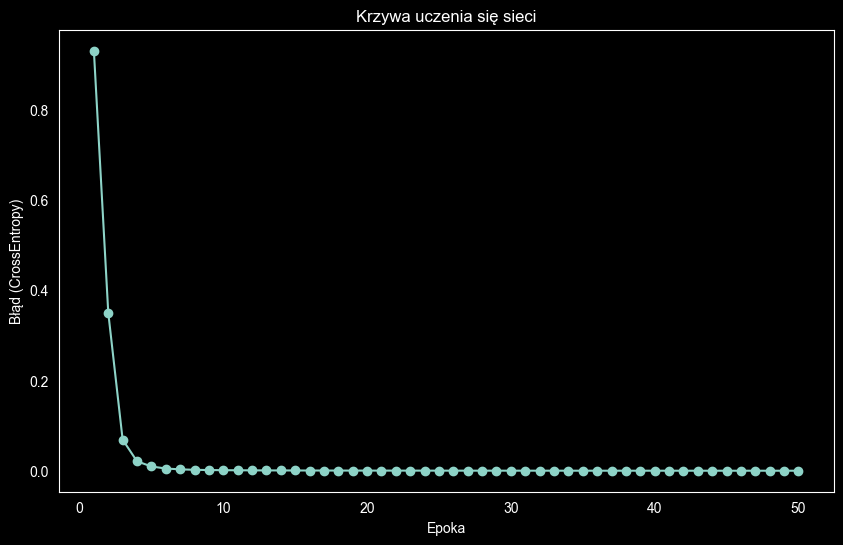


Błąd na zbiorze testowym: 0.0000
Dokładność na zbiorze testowym: 100.00%

Prognozowane klasy dla 5 próbek testowych:
Próbka 1: Klasa 0 (Prawdziwa: 0)
Próbka 2: Klasa 0 (Prawdziwa: 0)
Próbka 3: Klasa 2 (Prawdziwa: 2)
Próbka 4: Klasa 0 (Prawdziwa: 0)
Próbka 5: Klasa 1 (Prawdziwa: 1)


In [44]:
# z wizualizacją nauczania, ewaluacją i prognozowaniem

# Definicja modelu
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(13, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Inicjalizacja modelu
model = SimpleNN()

# Funkcja kosztu i optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Parametry trenowania
epochs = 50
batch_size = 16
num_batches = len(X_train) // batch_size
if num_batches == 0: num_batches = 1
loss_history = []

# Proces nauczania
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        # Pobranie batcha
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Średni błąd dla epoki
    avg_epoch_loss = epoch_loss / (len(X_train) / batch_size)
    loss_history.append(avg_epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f"Epoka {epoch+1}/{epochs}, Błąd (CrossEntropy): {avg_epoch_loss:.4f}")

# Wizualizacja procesu nauczania
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.xlabel('Epoka')
plt.ylabel('Błąd (CrossEntropy)')
plt.title('Krzywa uczenia się sieci')
plt.grid()
plt.show()

# Ewaluacja na zbiorze testowym
model.eval()
with torch.no_grad():
    y_test_logits = model(X_test)
    test_loss = loss_fn(y_test_logits, y_test).item()

    # Obliczanie dokładności (Accuracy)
    _, predicted = torch.max(y_test_logits, 1)
    correct = (predicted == y_test).sum().item()
    accuracy = correct / len(y_test)

    print(f"\nBłąd na zbiorze testowym: {test_loss:.4f}")
    print(f"Dokładność na zbiorze testowym: {accuracy*100:.2f}%")

# Prognozowanie dla nowych danych
with torch.no_grad():
    sample_data = X_test[:5]
    predictions = model(sample_data)
    _, predicted_classes = torch.max(predictions, 1)

# Wyświetlenie wyników prognozowania
print("\nPrognozowane klasy dla 5 próbek testowych:")
for i, cls in enumerate(predicted_classes):
    print(f"Próbka {i + 1}: Klasa {cls.item()} (Prawdziwa: {y_test[i].item()})")

# Zastosowanie konwolucyjnych sieci neuronowych (CNN) do analizy obrazu

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Przygotowanie danych
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Przekształcanie danych
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding etykiet
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Budowa modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Wizualizacja procesu nauczania
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Proces nauczania CNN w TensorFlow')
plt.legend()
plt.grid()
plt.show()

# Testowanie modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Dokładność modelu na zbiorze testowym: {accuracy:.2f}")

# Prognozowanie dla nowych danych
new_data = X_test[:5]  # Przykładowe dane testowe
predictions = model.predict(new_data)

# Wyświetlenie wyników prognozowania
print("Prognozowane etykiety dla przykładowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: Prognozowana etykieta: {tf.argmax(prediction).numpy()}")


RuntimeError: shape '[28, 28]' is invalid for input of size 13

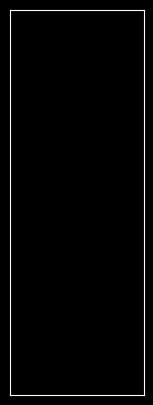

In [54]:
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)

    pred_idx = np.argmax(predictions[i])
    true_idx = np.argmax(y_test[i])

    color = 'green' if pred_idx == true_idx else 'red'

    plt.xlabel(f"P: {class_names[pred_idx]}\n(T: {class_names[true_idx]})", color=color)
plt.show()